# Analyze A/B Test Results

This project will ensure you have mastered the subjects covered in the Hypothesis Testing lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the rubric.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)


For all questions in `Part I` notice links to [pandas documentation](https://pandas.pydata.org/) are provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**.

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful pandas link - `Dataframe.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [3]:
# number of rows
n_rows = df.shape[0]
print(f"Number of rows: {n_rows}")


Number of rows: 69889


`c)` The proportion of users converted.  [Helpful  Pandas Link - `Dataframe.mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [4]:
# overall conversion rate
overall_converted = df['converted'].mean()
print(f"Overall proportion converted: {overall_converted:.6f}")
assert 0 <= overall_converted <= 1, 'Conversion proportion must be between 0 and 1'


Overall proportion converted: 0.130478


`d)` Do any of the rows have missing values? [Helpful Pandas Link - `Dataframe.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link- `Dataframe.sum`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [5]:
# missing values per column and total
missing_by_col = df.isnull().sum()
print(missing_by_col)
print(f"Total missing values: {missing_by_col.sum()}")


country      0
group        0
converted    0
dtype: int64
Total missing values: 0


`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [6]:
# number of visitors from each country
country_counts = df['country'].value_counts()
print(country_counts)


country
US    48850
UK    17551
CA     3488
Name: count, dtype: int64


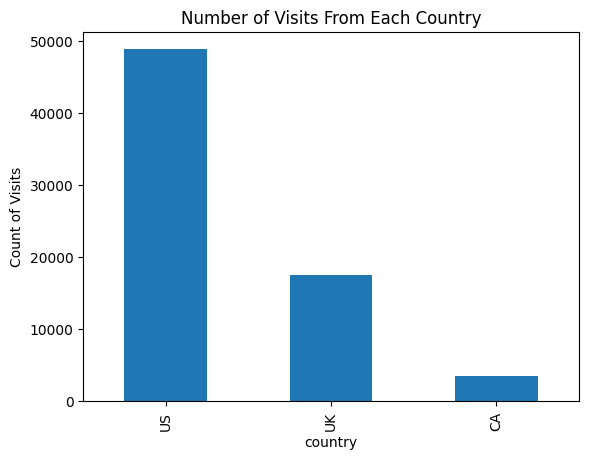

In [7]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

#### Extra counts for slides
- Total Variant (Treatment) Visitors
- Total Control Participants
- Updated country bar chart

In [8]:

# Total Variant Visitors and Total Control Participants
total_variant_visitors = (df['group'] == 'treatment').sum()
total_control_participants = (df['group'] == 'control').sum()
print(f"Total Variant Visitors: {total_variant_visitors}")
print(f"Total Control Participants: {total_control_participants}")
assert total_variant_visitors + total_control_participants == n_rows, "Counts should add up to total rows"


Total Variant Visitors: 35211
Total Control Participants: 34678


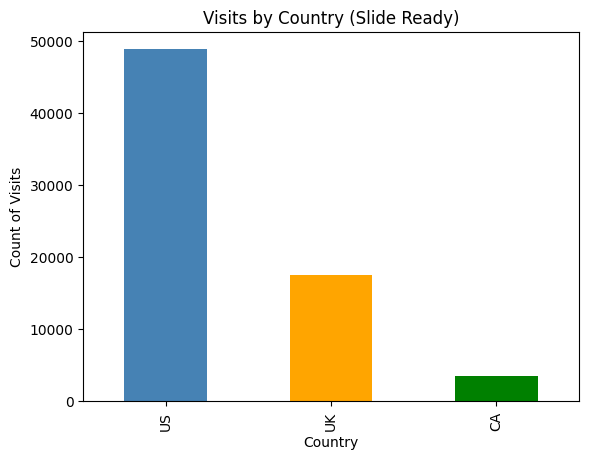

In [9]:

# Updated bar chart of where users are from (for slides)
df['country'].value_counts().plot(kind='bar', color=['steelblue', 'orange', 'green'])
plt.title('Visits by Country (Slide Ready)')
plt.ylabel('Count of Visits')
plt.xlabel('Country')
plt.show()


`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [10]:
# data types and non-categorical column identification
info = df.info()
non_categorical_cols = df.select_dtypes(exclude='object').columns.tolist()
print(f"Non-categorical columns: {non_categorical_cols}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB
Non-categorical columns: ['converted']


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Here you can use one of the functions you used in an earlier question**.

In [11]:
# possible values for converted
converted_values = np.sort(df['converted'].unique())
print(f"Converted unique values: {converted_values}")
print('Binary indicator makes sense: 1 = converted, 0 = not converted.')


Converted unique values: [0 1]
Binary indicator makes sense: 1 = converted, 0 = not converted.


<a id='probability'></a>
#### Part II - Probability

Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [12]:
# P(converted)
p_convert = overall_converted
print(f"P(converted) = {p_convert:.6f}")


P(converted) = 0.130478


`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [13]:
# P(converted | control)
p_convert_control = df.query('group == "control"')['converted'].mean()
print(f"P(converted | control) = {p_convert_control:.6f}")


P(converted | control) = 0.105254


`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [14]:
# P(converted | treatment)
p_convert_treatment = df.query('group == "treatment"')['converted'].mean()
print(f"P(converted | treatment) = {p_convert_treatment:.6f}")


P(converted | treatment) = 0.155321


`d)` Do you see evidence that the treatment is related to higher `converted` rates?

In [15]:
# Observed difference between treatment and control conversion rates
obs_diff = p_convert_treatment - p_convert_control
print(f"Observed difference (treatment - control) = {obs_diff:.6f}")
print('Observed treatment conversion is higher; formal testing follows in Part III.')


Observed difference (treatment - control) = 0.050067
Observed treatment conversion is higher; formal testing follows in Part III.


`e)` What is the probability that an individual was in the `treatment`?

In [16]:
# P(assignment to treatment)
p_in_treatment = (df['group'] == 'treatment').mean()
print(f"P(assignment to treatment) = {p_in_treatment:.6f}")


P(assignment to treatment) = 0.503813


`f)` What is the probability that an individual was from Canada `CA`?

In [17]:
# P(country == Canada)
p_canada = (df['country'] == 'CA').mean()
print(f"P(country = CA) = {p_canada:.6f}")


P(country = CA) = 0.049908


`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [18]:
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [19]:
# P(converted | UK)
p_convert_uk = df.query('country == "UK"')['converted'].mean()
print(f"P(converted | UK) = {p_convert_uk:.6f}")


P(converted | UK) = 0.125121


`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

In [20]:
# Do conversion rates differ by country?
conv_by_country = df.groupby('country')['converted'].mean()
print(conv_by_country)
print('Differences are modest (~0.007 range). A formal test would be needed for significance; descriptively the rates are close.')


country
CA    0.125287
UK    0.125121
US    0.132774
Name: converted, dtype: float64
Differences are modest (~0.007 range). A formal test would be needed for significance; descriptively the rates are close.


`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [21]:
# Method 1  - explicitly calculate each probability

def conv_prob(country, grp):
    subset = df[(df['country'] == country) & (df['group'] == grp)]
    return subset['converted'].mean()

us_control = conv_prob('US', 'control')
us_treatment = conv_prob('US', 'treatment')
uk_control = conv_prob('UK', 'control')
uk_treatment = conv_prob('UK', 'treatment')
ca_control = conv_prob('CA', 'control')
ca_treatment = conv_prob('CA', 'treatment')

print({
    'US_control': us_control,
    'US_treatment': us_treatment,
    'UK_control': uk_control,
    'UK_treatment': uk_treatment,
    'CA_control': ca_control,
    'CA_treatment': ca_treatment,
})


{'US_control': 0.10731404958677686, 'US_treatment': 0.1577687626774848, 'UK_control': 0.10164866401364411, 'UK_treatment': 0.148698035632709, 'CA_control': 0.0944741532976827, 'CA_treatment': 0.15401662049861495}


In [22]:
# Method 2 - quickly calculate using `groupby`
print(df.query('country == "US"').groupby('group')['converted'].mean())
print('\nGroupby for all countries:')
print(df.groupby(['country', 'group'])['converted'].mean())


group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

Groupby for all countries:
country  group    
CA       control      0.094474
         treatment    0.154017
UK       control      0.101649
         treatment    0.148698
US       control      0.107314
         treatment    0.157769
Name: converted, dtype: float64


##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [23]:
# Final table of conversion rates by country and group
import pandas as pd

conversion_table = pd.DataFrame({
    'US': {'Control': us_control, 'Treatment': us_treatment},
    'UK': {'Control': uk_control, 'Treatment': uk_treatment},
    'CA': {'Control': ca_control, 'Treatment': ca_treatment},
})
print(conversion_table.applymap(lambda x: f"{100*x:.1f}%"))
print('\nTreatment beats control in all countries; differences across countries are small, suggesting limited interaction.')


              US     UK     CA
Control    10.7%  10.2%   9.4%
Treatment  15.8%  14.9%  15.4%

Treatment beats control in all countries; differences across countries are small, suggesting limited interaction.


C:\Users\Ohara\AppData\Local\Temp\ipykernel_20392\3742527587.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(conversion_table.applymap(lambda x: f"{100*x:.1f}%"))


<a id='experimentation'></a>
### Part III - Experimentation

Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [24]:
p_null = df['converted'].mean()
p_treatment_null  = p_null
p_control_null = p_null
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

print(f"p_null = {p_null:.6f}, n_treatment = {n_treatment}, n_control = {n_control}")


p_null = 0.130478, n_treatment = 35211, n_control = 34678


`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [25]:
# treatment_converted

# simulate treatment conversions under null
# Using numpy's binomial for speed
treatment_converted = np.random.binomial(1, p_treatment_null, n_treatment).tolist()
print(f"Simulated treatment conversion rate (single draw): {np.mean(treatment_converted):.6f}")


Simulated treatment conversion rate (single draw): 0.129647

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [26]:
# control_converted

control_converted = np.random.binomial(1, p_control_null, n_control).tolist()
print(f"Simulated control conversion rate (single draw): {np.mean(control_converted):.6f}")


Simulated control conversion rate (single draw): 0.127949


`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [27]:
# estimated difference in conversion rates between the treatment and control groups based on your simulated values

p_diff_null = np.mean(treatment_converted) - np.mean(control_converted)
print(f"Simulated p_treatment - p_control (single draw) = {p_diff_null:.6f}")


Simulated p_treatment - p_control (single draw) = 0.001698

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [28]:
p_diffs = []
for _ in range(500):
    sim_treat = np.random.binomial(1, p_treatment_null, n_treatment)
    sim_ctrl = np.random.binomial(1, p_control_null, n_control)
    p_diffs.append(sim_treat.mean() - sim_ctrl.mean())

p_diffs = np.array(p_diffs)
print(f"Simulated null distribution mean: {p_diffs.mean():.6f}, std: {p_diffs.std():.6f}")


Simulated null distribution mean: 0.000099, std: 0.002489


`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

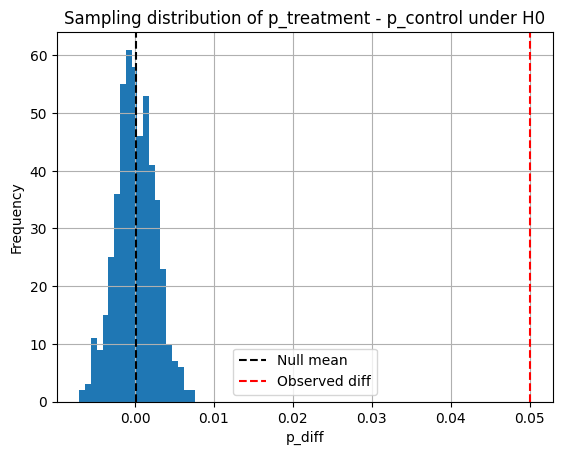

In [29]:
# p_diffs = pd.Series(p_diffs)
# p_diffs.hist(bins=20)

p_diffs_series = pd.Series(p_diffs)
p_diffs_series.hist(bins=20)
plt.axvline(p_diffs_series.mean(), color='black', linestyle='--', label='Null mean')
plt.axvline(obs_diff, color='red', linestyle='--', label='Observed diff')
plt.legend()
plt.title('Sampling distribution of p_treatment - p_control under H0')
plt.xlabel('p_diff')
plt.ylabel('Frequency')
plt.show()


`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [30]:
# proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`
p_value = (p_diffs > obs_diff).mean()
print(f"Observed difference (treatment - control): {obs_diff:.6f}")
print(f"One-sided p-value from simulation: {p_value:.6f}")


Observed difference (treatment - control): 0.050067
One-sided p-value from simulation: 0.000000


`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

The proportion in (g) is the one-sided p-value: the chance, under the null that both pages convert at the overall rate, of seeing a difference as large as the observed (treatment - control). With the observed lift (~5 percentage points) and the null simulations, this p-value is essentially 0, so at alpha=0.05 we reject H0 and conclude the treatment page performs better.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission

Please follow the directions in the classroom to submit this notebook, as well as your completed slides.